In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [42]:
company='PETR4.SA'
start = dt.datetime(2018,1,1)
end = dt.datetime(2021,1,1)

In [43]:
data = web.DataReader(company,'yahoo',start,end)

In [44]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [45]:
prediction_days = 60
x_train = []
y_train = []

In [46]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [47]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [48]:
model = Sequential()

In [49]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [50]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [51]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
22/22 [==============================] - 6s 73ms/step - loss: 0.1063
Epoch 2/25
22/22 [==============================] - 2s 79ms/step - loss: 0.0244
Epoch 3/25
22/22 [==============================] - 2s 75ms/step - loss: 0.0206
Epoch 4/25
22/22 [==============================] - 2s 77ms/step - loss: 0.0180
Epoch 5/25
22/22 [==============================] - 2s 73ms/step - loss: 0.0157
Epoch 6/25
22/22 [==============================] - 2s 87ms/step - loss: 0.0156
Epoch 7/25
22/22 [==============================] - 2s 77ms/step - loss: 0.0145
Epoch 8/25
22/22 [==============================] - 2s 71ms/step - loss: 0.0120
Epoch 9/25
22/22 [==============================] - 2s 72ms/step - loss: 0.0120
Epoch 10/25
22/22 [==============================] - 2s 72ms/step - loss: 0.0106
Epoch 11/25
22/22 [==============================] - 2s 86ms/step - loss: 0.0116
Epoch 12/25
22/22 [==============================] - 2s 76ms/step - loss: 0.0098
Epoch 13/25
22/22 [==================

In [52]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company,'yahoo',test_start,test_end)

In [53]:
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'], test_data['Close']),axis=0)

In [54]:
model_inputs = total_dataset[len(total_dataset)-len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1) 
model_inputs = scaler.transform(model_inputs)

In [55]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [56]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [57]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

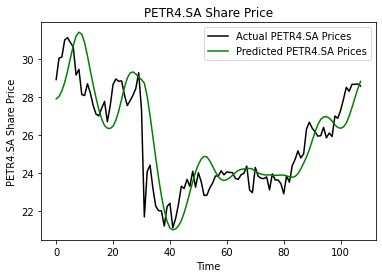

In [58]:
plt.plot(actual_prices, color='black', label=f'Actual {company} Prices')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} Prices')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [59]:
real_data = [model_inputs[len(model_inputs)+1 -prediction_days: len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

In [73]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

In [90]:
print('The last price was registered at {} is R${:.2f} and the price prediction for next day is R${:.2f}'.format(test_data.iloc[-1,:].name.strftime('%d/%m/%Y'),test_data['Close'][-1],prediction[0][0]))

The last price was registered at 11/06/2021 is R$28.57 and the price prediction for next day is R$29.10
